In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import pipeline
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_csv(r"C:\Users\97798\Desktop\archive (1)\mobile_prices_2023.csv")

In [83]:
data['Phone Name']

0                   POCO C50 (Royal Blue, 32 GB)
1                  POCO M4 5G (Cool Blue, 64 GB)
2                   POCO C51 (Royal Blue, 64 GB)
3                    POCO C55 (Cool Blue, 64 GB)
4                  POCO C51 (Power Black, 64 GB)
                          ...                   
1831        Infinix Note 7 (Forest Green, 64 GB)
1832        Infinix Note 7 (Bolivia Blue, 64 GB)
1833        Infinix Note 7 (Aether Black, 64 GB)
1834    Infinix Zero 8i (Silver Diamond, 128 GB)
1835            Infinix S5 (Quetzal Cyan, 64 GB)
Name: Phone Name, Length: 1836, dtype: object

In [84]:
data['Phone Name'].unique()

array(['POCO C50 (Royal Blue, 32 GB)', 'POCO M4 5G (Cool Blue, 64 GB)',
       'POCO C51 (Royal Blue, 64 GB)', ...,
       'Infinix Note 7 (Aether Black, 64 GB)',
       'Infinix Zero 8i (Silver Diamond, 128 GB)',
       'Infinix S5 (Quetzal Cyan, 64 GB)'], dtype=object)

In [86]:
data

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [98]:
data['Color']= data['Color'].str.split(',').str.get(0)

In [105]:
data['Number of Ratings']=data['Number of Ratings'].astype(int)

In [115]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Name of Phone,Color
0,4.2,33561,2,32,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17,POCO C50,Royal Blue
1,4.2,77128,4,64,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17,POCO M4 5G,Cool Blue
2,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO C51,Royal Blue
3,4.2,22621,4,64,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17,POCO C55,Cool Blue
4,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO C51,Power Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Forest Green
1832,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Bolivia Blue
1833,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Aether Black
1834,4.2,7117,8,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17,Infinix Zero 8i,Silver Diamond


In [131]:


# Applying the function to the 'Back/Rare Camera' column
data.drop(['Front Camera Resolutions', 'Front Camera Types'], axis =1, inplace=True )


In [132]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Name of Phone,Color
0,4.2,33561,2,32,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17,POCO C50,Royal Blue
1,4.2,77128,4,64,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17,POCO M4 5G,Cool Blue
2,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO C51,Royal Blue
3,4.2,22621,4,64,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17,POCO C55,Cool Blue
4,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO C51,Power Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Forest Green
1832,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Bolivia Blue
1833,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Aether Black
1834,4.2,7117,8,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17,Infinix Zero 8i,Silver Diamond


In [133]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Name of Phone,Color
0,4.2,33561,2,32,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17,POCO C50,Royal Blue
1,4.2,77128,4,64,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17,POCO M4 5G,Cool Blue
2,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO C51,Royal Blue
3,4.2,22621,4,64,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17,POCO C55,Cool Blue
4,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO C51,Power Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Forest Green
1832,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Bolivia Blue
1833,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix Note 7,Aether Black
1834,4.2,7117,8,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17,Infinix Zero 8i,Silver Diamond


In [134]:
def extract_camera_info(camera_info):
    if isinstance(camera_info, str):
        parts = camera_info.split(" + ")
        camera_resolutions = []
        camera_types = []

        for part in parts:
            if 'MP' in part:
                camera_resolutions.append(part)
            else:
                camera_types.append(part)

        return ', '.join(camera_resolutions), ', '.join(camera_types)
    else:
        return np.nan, np.nan

# Applying the function to the 'Back/Rare Camera' column
data[['Camera Resolutions', 'Camera Types']] = data['Back/Rare Camera'].apply(extract_camera_info).apply(pd.Series)



         Camera Resolutions      Camera Types
0           8MP Dual Camera                  
1                 50MP, 2MP                  
2      8MP Dual Rear Camera                  
3     50MP Dual Rear Camera                  
4      8MP Dual Rear Camera                  
...                     ...               ...
1831         48MP, 2MP, 2MP    AI Lens Camera
1832         48MP, 2MP, 2MP    AI Lens Camera
1833         48MP, 2MP, 2MP    AI Lens Camera
1834         48MP, 8MP, 2MP    AI Lens Camera
1835         16MP, 5MP, 2MP  Low Light Sensor

[1836 rows x 2 columns]


In [145]:
data['Camera Resolutions']=data['Camera Resolutions'].str.replace('MP','')

In [147]:
data.drop(['Back/Rare Camera'], axis =1, inplace = True)

In [171]:
data['Price in INR']=data['Price in INR'].str.replace(',','')

In [172]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Name of Phone,Color,Camera Resolutions,Camera Types
0,4.2,33561,2,32,5,5000,Mediatek,5649,2023-06-17,POCO C50,Royal Blue,8,
1,4.2,77128,4,64,8,5000,Mediatek,11999,2023-06-17,POCO M4 5G,Cool Blue,50,
2,4.3,15175,4,64,5,5000,Helio,6999,2023-06-17,POCO C51,Royal Blue,8,
3,4.2,22621,4,64,5,5000,Mediatek,7749,2023-06-17,POCO C55,Cool Blue,50,
4,4.3,15175,4,64,5,5000,Helio,6999,2023-06-17,POCO C51,Power Black,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4,64,16,5000,MediaTek,14999,2023-06-17,Infinix Note 7,Forest Green,48,AI Lens Camera
1832,4.3,25582,4,64,16,5000,MediaTek,14999,2023-06-17,Infinix Note 7,Bolivia Blue,48,AI Lens Camera
1833,4.3,25582,4,64,16,5000,MediaTek,14999,2023-06-17,Infinix Note 7,Aether Black,48,AI Lens Camera
1834,4.2,7117,8,128,16,4500,MediaTek,18999,2023-06-17,Infinix Zero 8i,Silver Diamond,48,AI Lens Camera


In [173]:
data['Date of Scraping']

0       2023-06-17
1       2023-06-17
2       2023-06-17
3       2023-06-17
4       2023-06-17
           ...    
1831    2023-06-17
1832    2023-06-17
1833    2023-06-17
1834    2023-06-17
1835    2023-06-17
Name: Date of Scraping, Length: 1836, dtype: object

In [175]:
data['Date of Scraping'] = pd.to_datetime(data['Date of Scraping'])

# Extract features
data['Year'] = data['Date of Scraping'].dt.year
data['Month'] = data['Date of Scraping'].dt.month
data['Day'] = data['Date of Scraping'].dt.day
data['DayOfWeek'] = data['Date of Scraping'].dt.dayofweek  # Monday is 0, Sunday is 6

# Encoding cyclic features (Month and DayOfWeek)
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)
data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)

# Time since reference date (assuming a reference date)
reference_date = pd.to_datetime('2023-01-01')
data['DaysSinceReference'] = (data['Date of Scraping'] - reference_date).dt.days

In [180]:
data.drop(['Year','Month','Day','DayOfWeek','Month_sin','Month_cos','DayOfWeek_sin','DayOfWeek_cos','DaysSinceReference'], axis =1, inplace = True)

In [181]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Name of Phone,Color,Camera Resolutions,Camera Types
0,4.2,33561,2,32,5,5000,Mediatek,5649,2023-06-17,POCO C50,Royal Blue,8,
1,4.2,77128,4,64,8,5000,Mediatek,11999,2023-06-17,POCO M4 5G,Cool Blue,50,
2,4.3,15175,4,64,5,5000,Helio,6999,2023-06-17,POCO C51,Royal Blue,8,
3,4.2,22621,4,64,5,5000,Mediatek,7749,2023-06-17,POCO C55,Cool Blue,50,
4,4.3,15175,4,64,5,5000,Helio,6999,2023-06-17,POCO C51,Power Black,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4,64,16,5000,MediaTek,14999,2023-06-17,Infinix Note 7,Forest Green,48,AI Lens Camera
1832,4.3,25582,4,64,16,5000,MediaTek,14999,2023-06-17,Infinix Note 7,Bolivia Blue,48,AI Lens Camera
1833,4.3,25582,4,64,16,5000,MediaTek,14999,2023-06-17,Infinix Note 7,Aether Black,48,AI Lens Camera
1834,4.2,7117,8,128,16,4500,MediaTek,18999,2023-06-17,Infinix Zero 8i,Silver Diamond,48,AI Lens Camera


In [193]:
data.dtypes

Rating ?/5            float64
Number of Ratings       int32
RAM                    object
ROM/Storage            object
Front Camera           object
Battery                object
Processor              object
Price in INR           object
Name of Phone          object
Color                  object
Camera Resolutions     object
Camera Types           object
Year of Scraping        int32
Month of Scraping       int32
dtype: object

In [189]:
data['Month of Scraping']=data['Date of Scraping'].dt.month

In [227]:
data['ROM/Storage'] = data['ROM/Storage'].replace('NA', np.nan)

In [229]:
data['ROM/Storage'].astype(float)

0        32.0
1        64.0
2        64.0
3        64.0
4        64.0
        ...  
1831     64.0
1832     64.0
1833     64.0
1834    128.0
1835     64.0
Name: ROM/Storage, Length: 1836, dtype: float64

In [231]:
data['Number of Ratings']

0       33561
1       77128
2       15175
3       22621
4       15175
        ...  
1831    25582
1832    25582
1833    25582
1834     7117
1835    15701
Name: Number of Ratings, Length: 1836, dtype: int32

In [239]:
data.Battery.unique()

array(['5000', '4500', '4000', '5160', '6000', '5065', '4200', '4300',
       '4230', 'A15', 'A13', 'A14', 'A16', 'A12', 'A9', 'Apple', '1',
       '800', '0', '3300', '3900', '7000', '3700', '4700', '3000', '1500',
       '1000', nan, '2000', '2600', '2050', '4800', '4015', '4025',
       '3400', '3765', '4350', '4310', '3200', '4020', '4410', '4270',
       '4926', '2915', '4600', '4030', '4050', '4810', '4830', '4870',
       '4450', '3315', '3225', '3260', '4250', '4520', '3080', '3120',
       '5018', '4100', '5020', '4850', '3030', '3010', '4820', '4780',
       '5300', '1020', 'MediaTek', 'Brand', '1200', '1450', '1150',
       '5050', '3060', 'Unisoc', '4950', '12', '2150', '950', '1430',
       '1110', '2', '4400', '4610', '4115', '3800', '4085', '2100',
       '3340', '3450', '2300', '2200', '2610', '2580', '1400', '850',
       '650', '1800', '2500', '3760', '3500', '5200'], dtype=object)

In [240]:
data['Battery'] = pd.to_numeric(data['Battery'], errors='coerce')


In [261]:
data['Camera Resolutions']=data['Camera Resolutions'].astype(float)

In [273]:
data['Year of Scraping'].unique()

array([2023])

In [274]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Front Camera,Battery,Processor,Price in INR,Name of Phone,Color,Camera Resolutions,Camera Types,Year of Scraping,Month of Scraping
0,4.2,33561,2.0,32,5.0,5000.0,Mediatek,5649.0,POCO C50,Royal Blue,8.0,,2023,6
1,4.2,77128,4.0,64,8.0,5000.0,Mediatek,11999.0,POCO M4 5G,Cool Blue,50.0,,2023,6
2,4.3,15175,4.0,64,5.0,5000.0,Helio,6999.0,POCO C51,Royal Blue,8.0,,2023,6
3,4.2,22621,4.0,64,5.0,5000.0,Mediatek,7749.0,POCO C55,Cool Blue,50.0,,2023,6
4,4.3,15175,4.0,64,5.0,5000.0,Helio,6999.0,POCO C51,Power Black,8.0,,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4.0,64,16.0,5000.0,MediaTek,14999.0,Infinix Note 7,Forest Green,48.0,AI Lens Camera,2023,6
1832,4.3,25582,4.0,64,16.0,5000.0,MediaTek,14999.0,Infinix Note 7,Bolivia Blue,48.0,AI Lens Camera,2023,6
1833,4.3,25582,4.0,64,16.0,5000.0,MediaTek,14999.0,Infinix Note 7,Aether Black,48.0,AI Lens Camera,2023,6
1834,4.2,7117,8.0,128,16.0,4500.0,MediaTek,18999.0,Infinix Zero 8i,Silver Diamond,48.0,AI Lens Camera,2023,6


In [279]:
lens_related_keywords = ['Lens', 'Camera']
data['Camera Types'] = data['Camera Types'].apply(lambda x: x if isinstance(x, str) and any(keyword in x for keyword in lens_related_keywords) else np.nan)

In [288]:
data['Camera Types']=data['Camera Types'].replace(np.nan,'Unknown')

In [289]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Front Camera,Battery,Processor,Price in INR,Name of Phone,Color,Camera Resolutions,Camera Types,Year of Scraping,Month of Scraping
0,4.2,33561,2.0,32,5.0,5000.0,Mediatek,5649.0,POCO C50,Royal Blue,8.0,Unknown,2023,6
1,4.2,77128,4.0,64,8.0,5000.0,Mediatek,11999.0,POCO M4 5G,Cool Blue,50.0,Unknown,2023,6
2,4.3,15175,4.0,64,5.0,5000.0,Helio,6999.0,POCO C51,Royal Blue,8.0,Unknown,2023,6
3,4.2,22621,4.0,64,5.0,5000.0,Mediatek,7749.0,POCO C55,Cool Blue,50.0,Unknown,2023,6
4,4.3,15175,4.0,64,5.0,5000.0,Helio,6999.0,POCO C51,Power Black,8.0,Unknown,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4.0,64,16.0,5000.0,MediaTek,14999.0,Infinix Note 7,Forest Green,48.0,AI Lens Camera,2023,6
1832,4.3,25582,4.0,64,16.0,5000.0,MediaTek,14999.0,Infinix Note 7,Bolivia Blue,48.0,AI Lens Camera,2023,6
1833,4.3,25582,4.0,64,16.0,5000.0,MediaTek,14999.0,Infinix Note 7,Aether Black,48.0,AI Lens Camera,2023,6
1834,4.2,7117,8.0,128,16.0,4500.0,MediaTek,18999.0,Infinix Zero 8i,Silver Diamond,48.0,AI Lens Camera,2023,6


In [290]:
data.to_csv('mobile_dataset.csv')

<Axes: xlabel='RAM', ylabel='Price in INR'>

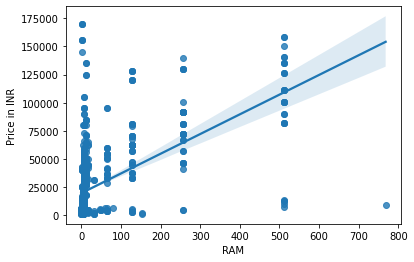

In [296]:
sns.regplot(
data = data,
x = 'RAM',
y = 'Price in INR')

In [293]:
data['Price in INR'].unique()

array([  5649.,  11999.,   6999.,   7749.,   9249.,  13999.,   8999.,
         6499.,  15999.,  10999.,  23999.,  17999.,  14499.,  17499.,
        21999.,  29999.,  16499.,  32999.,  19499.,  14999.,   8499.,
        16999.,  20999.,  13689.,  27999.,  24999.,   9999.,  11990.,
        19999.,  15490.,  39999.,  18999.,  12999.,  12990.,  25999.,
        36999.,  10499.,   5999.,  12499.,  15499.,   7076.,   7078.,
        13399.,  15495.,  12350.,   8449.,   7499.,  10699.,   9699.,
         7180.,  13589.,  10489.,   8949.,  11499.,   8049.,   8749.,
        11998.,  11300.,  11979.,  13499.,   8427.,  11699.,   8910.,
        11495.,   5549.,  12490.,   9499.,  11199.,   9290.,  34999.,
        16846.,  38999.,  20990.,  10790.,   6049.,  32299.,  12700.,
        22999.,  17750.,  18499.,  61999.,  69999.,  44999.,  40999.,
        67999.,  80999.,  78999.,  53999., 127999.,  71999., 119999.,
        56999., 100999., 110999.,  91999.,  46999., 125999.,  66999.,
        81999., 1349